# Xavier Valdez Group 3

# Part 1

 For part 1 I decided to scrape the website newegg.com for ps4 games. I extracted the product name, price, shipping and brand. 

In [ ]:
# ! pip install beautifulsoup4

In [75]:
import bs4
from urllib.request import urlopen as uReq 
from bs4 import BeautifulSoup as soup 


url='https://www.newegg.com/PS4-Video-Games/SubCategory/ID-3141'
uClient=uReq(url)
page = uClient.read()
uClient.close()


#parsing 
page_soup = soup(page, "html.parser")

#grabs products 
containers= page_soup.findAll("div",{"class":"item-container"})


#file
filename = "products.csv"
f = open(filename,"w")
headers= 'brand, product, shipping\n'
f.write("headers")

for container in containers: 
    #scrape the brand
    brand = container.div.div.a.img["title"]
    
     #scrape the product name
    title = container.findAll("a", {"class":"item-title"})
    productName= title[0].text 
    
     #scrape the shipping
    shipping_container= container.findAll("li", {"class":"price-ship"})
    shipping = shipping_container[0].text.strip()
    
    #scrape price
    pricec = container.find("li", {"class":"price-current"})
    #removing all white spaces
    price= pricec.text.strip('price-current')
    
    
    print("Brand: " + brand)
    print("Product: " + productName)
    print("Shipping: " + shipping)
    print("Price: " + price )
    
    f.write(brand + ',' + productName.replace(',','|') + ',' + shipping + "\n")
    
f.close()
    

Brand: PlayStation
Product: The Last of Us Part II - PlayStation 4
Shipping: Free Shipping
Price: $29.99 –
Brand: Ubisoft
Product: For Honor Marching Fire Edition - PlayStation 4
Shipping: $1.99 Shipping
Price: $32.99 –
Brand: Ubisoft
Product: Tom Clancy's The Division 2 - PlayStation 4
Shipping: Free Shipping
Price: $15.00 (6 Offers)–
Brand: Bethesda Softworks
Product: The Elder Scrolls Online: Elsweyr - PlayStation 4
Shipping: Free Shipping
Price: $25.29 (3 Offers)–
Brand: Activision
Product: Sekiro: Shadows Die Twice - PlayStation 4
Shipping: Free Shipping
Price: $48.00 (6 Offers)–
Brand: Sega
Product: Yakuza 6: Essence of Art Edition - PlayStation 4
Shipping: Free Shipping
Price: $59.99 –
Brand: Activision
Product: Call of Duty: Modern Warfare - PlayStation 4
Shipping: Free Shipping
Price: $50.59 (11 Offers)–
Brand: PlayStation
Product: Knack 2 - PlayStation 4
Shipping: $2.99 Shipping
Price: $19.99 (2 Offers)–
Brand: Rockstar Games
Product: Red Dead Redemption 2 - PlayStation 4
Shi

# Part 2

For part 2 I used Numpy to go trough my whole scrape and used the np.mean() function to get the average price of a ps4s games. 
I also used Pandas to create two data frames. The first table have two columns: Product name and shipping data. The second table have three columns: Product name, Brand and Price. Trough Pandas I also have able to create a shipping filter and a price filter functionalities.  

In [76]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
from collections import defaultdict
import re

url='https://www.newegg.com/PS4-Video-Games/SubCategory/ID-3141'

with uReq(url) as uClient:
    page = uClient.read()

# parsing
page_soup = soup(page, "html.parser")

# grabs products
containers= page_soup.findAll("div",{"class":"item-container"})

# save to file
filename = "products.csv"


#creating two empty dictionaries
d = defaultdict(list)
d1 = defaultdict(list)

# for loop fills dicts
for container in containers:
   #scrape the brand
    brand = container.div.div.a.img["title"]
    
     #scrape the product name
    title = container.findAll("a", {"class":"item-title"})
    product_name= title[0].text 
    
     #scrape the shipping
    shipping_container= container.findAll("li", {"class":"price-ship"})
    shipping = shipping_container[0].text.strip()
    
    #scrape price
    pricec = container.find("li", {"class":"price-current"})
    #removing all white spaces from price
    price= pricec.text.strip('price-current')
    
    
    d['Product'].append(product_name)
    d['shipping'].append(shipping)
    d1['Product'].append(product_name)
    d1['Brand'].append(brand)
    d1['price'].append(price)
    
    
# create dataframe using pandas feature
df = pd.DataFrame(d) #product and shipping
df1 =pd.DataFrame(d1) #product, brand and price


# clean shipping column
df['shipping'] = df['shipping'].apply(lambda x: 0 if x == 'Free Shipping' else x)

#cleaning price column
df1['price'] = df1['price'].str.extract('(\d+\.?\d+)').astype(float)

#string converted to float
df['shipping'] = df['shipping'].apply(lambda x: 0 if x == 'Special Shipping' else x) # probably should be handled in a special way
df['shipping'] = df['shipping'].apply(lambda x: x if x == 0 else re.sub("[^0-9]", "", x))
df['shipping'] = df['shipping'].astype(float)

# save dataframe to csv files
df.to_csv('dataframe.csv', index=False)
df1.to_csv('dataframe1.csv', index=False)


# shipping filter 
print('This is all games where shipping is $10 dollars:', df[df['shipping'] < 10])

#price filter
print( 'This are all the games where the price is greater than $40: ', df1[df1['price'] > 40])


#average price using numpy feature
meanPrice= np.mean(df1['price']) 
print('The average price of a ps4 game is', meanPrice)



This is all games where shipping is $10 dollars:                                               Product  shipping
0              The Last of Us Part II - PlayStation 4       0.0
2         Tom Clancy's The Division 2 - PlayStation 4       0.0
3   The Elder Scrolls Online: Elsweyr - PlayStation 4       0.0
4           Sekiro: Shadows Die Twice - PlayStation 4       0.0
5    Yakuza 6: Essence of Art Edition - PlayStation 4       0.0
6        Call of Duty: Modern Warfare - PlayStation 4       0.0
8               Red Dead Redemption 2 - PlayStation 4       0.0
9               Monster Hunter: World - PlayStation 4       0.0
10         Hitman: Definitive Edition - PlayStation 4       0.0
11  Divinity: Original Sin II Definitive Edition -...       0.0
14            Mirror's Edge: Catalyst - PlayStation 4       0.0
15        Middle-Earth: Shadow Of War - PlayStation 4       0.0
16                          Destiny 2 - PlayStation 4       0.0
17                         Kromaia Omega for Sony PS4  

# Part 3

For part 3 I merge the two data sets using pd.merge() function to have one big data set that includes the product,shipping, brand and prices. 

In [77]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
from collections import defaultdict
import re


# save dataframe to csv files
df.to_csv('dataframe.csv', index=False)
df1.to_csv('dataframe1.csv', index=False)



#pandas and merge data frames
df2 = pd.merge(df,df1, how ='inner')
df2.to_csv('dataframe2.csv', index=False)
print(df2)

                                              Product  shipping  \
0              The Last of Us Part II - PlayStation 4       0.0   
1              The Last of Us Part II - PlayStation 4       0.0   
2              The Last of Us Part II - PlayStation 4       0.0   
3              The Last of Us Part II - PlayStation 4       0.0   
4     For Honor Marching Fire Edition - PlayStation 4     199.0   
5         Tom Clancy's The Division 2 - PlayStation 4       0.0   
6   The Elder Scrolls Online: Elsweyr - PlayStation 4       0.0   
7           Sekiro: Shadows Die Twice - PlayStation 4       0.0   
8    Yakuza 6: Essence of Art Edition - PlayStation 4       0.0   
9        Call of Duty: Modern Warfare - PlayStation 4       0.0   
10                            Knack 2 - PlayStation 4     299.0   
11              Red Dead Redemption 2 - PlayStation 4       0.0   
12              Monster Hunter: World - PlayStation 4       0.0   
13         Hitman: Definitive Edition - PlayStation 4       0.

# Part 4 

In [78]:
def longest_word(filename):
    with open(filename, 'r') as infile:
              words = infile.read().split(',')
    max_len = len(max(words, key=len))
    return [word for word in words if len(word) == max_len]

print(longest_word('dataframe2.csv'))


['9.99\nYakuza 6: The Song of Life (After Hours Premium Edition) - PlayStation 4']


# Part 5 

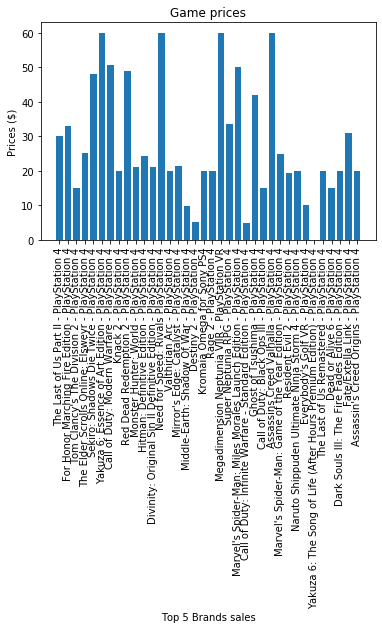

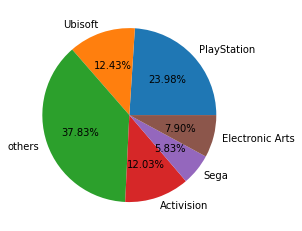

In [79]:

import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('dataframe1.csv')

plt.bar(df1.Product, df1.price)
plt.title("Game prices")
plt.xlabel("Top 5 Brands sales")
plt.xticks(rotation=90)
plt.ylabel("Prices ($)")
plt.show()


top5 = ["PlayStation", "Ubisoft", "Electronic Arts", "Activision", "Sega"]

# Change all the other brands to "other"
df1.loc[~df1.Brand.isin(top5), "Brand"] = "others"

# Change every price so each brand has its own total
df1.price = df1.groupby("Brand").price.transform("sum")

# Remove duplicates from the Brand column so we can easily calculate percentages
df1 = df1.drop_duplicates(subset="Brand")

# Create a new Percentage column for the percentages
df1["Percentage"] = df1.price / df1.price.sum() * 100

plt.pie(df1.Percentage, labels=df1.Brand, autopct="%1.2f%%")
plt.show()

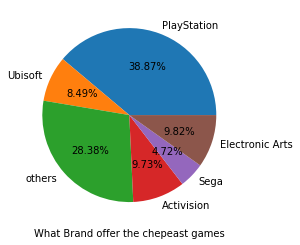

In [58]:

import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv('dataframe2.csv')


plt.xticks(rotation=90)
plt.xlabel("What Brand offer the chepeast games")
top5 = ["PlayStation", "Ubisoft", "Electronic Arts", "Activision", "Sega"] 

# Change all the other brands to "other"
df1.loc[~df1.Brand.isin(top5), "Brand"] = "others"

# Change every price so each brand has its own total
df1.price = df1.groupby("Brand").price.transform("sum")

# Remove duplicates from the Brand column so we can easily calculate percentages
df1 = df1.drop_duplicates(subset="Brand")

# Create a new Percentage column for the percentages
df1["Percentage"] = df1.price / df1.price.mean() * 100

plt.pie(df1.Percentage, labels=df1.Brand, autopct="%1.2f%%")
plt.show()

# References:
PWSDS Ch1,Ch2,Ch3,Ch4
PDA Ch4 and Ch5
PDA Ch6,Ch7,Ch8
PDA Ch10
PDA ch9



Youtube:https://www.youtube.com/watch?v=ng2o98k983k&t=366s